# 2.3.1 Загрузка данных и первичный анализ

In [53]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import json
import joblib
from datetime import datetime


In [45]:
# Scikit-learn компоненты
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Модели
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# Метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance


In [2]:
# Загрузка данных
df = pd.read_csv('./S06-hw-dataset-01.csv')

In [3]:
print("Первые 5 строк данных:")
print(df.head())

Первые 5 строк данных:
   id     num01     num02     num03     num04     num05     num06     num07  \
0   1 -0.946058 -0.070313  1.824445 -2.754422  0.808865 -0.111094 -0.268950   
1   2 -2.484027  0.739378  1.596908 -2.586479 -0.033225 -3.054412 -4.706908   
2   3  1.522629  7.159635 -0.564903 -4.493110  1.623610  5.450187 -0.974595   
3   4  0.463373 -1.073908  1.752813  0.362786  2.790872  4.082385  0.322283   
4   5  3.188390 -4.701692 -0.689918 -0.448995  0.373821 -3.275363 -1.760931   

      num08     num09  ...     num20     num21     num22     num23     num24  \
0 -3.078210  0.801275  ... -1.616515 -1.989464  1.407390 -0.218362  2.016052   
1 -9.795169  0.145911  ... -1.727040 -0.583997  1.136761  0.285978 -0.310879   
2 -5.189589  1.600591  ...  0.524408  2.022430  1.278358 -0.850547  0.847457   
3  3.390984 -0.033929  ...  2.399834 -1.431576 -0.746987  0.049639  2.414689   
4  0.923689  0.537345  ... -2.183407 -2.896590  2.440343 -1.097168  1.457323   

   cat_contract  cat_

In [4]:
print("Информация о датафрейме:")
print(df.info())

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-

In [5]:
print("Базовые статистики:")
print(df.describe())

Базовые статистики:
                id         num01         num02         num03         num04  \
count  12000.00000  12000.000000  12000.000000  12000.000000  12000.000000   
mean    6000.50000      0.013705     -0.005278     -0.002357      0.038404   
std     3464.24595      2.096534      3.544498      1.004417      2.087318   
min        1.00000     -8.155181    -14.605579     -4.374043     -7.753301   
25%     3000.75000     -1.423844     -2.303772     -0.685618     -1.374579   
50%     6000.50000     -0.047565      0.053348     -0.009186      0.038766   
75%     9000.25000      1.422676      2.335937      0.671441      1.484417   
max    12000.00000      8.610863     16.299709      3.651692      7.571965   

              num05         num06         num07         num08         num09  \
count  12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean      -0.006301     -0.865297     -0.702877     -0.290694     -0.008154   
std        1.007329      3.888966      1

In [6]:
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64


In [16]:
# Анализ категориальных признаков
categorical_cols = ['cat_contract', 'cat_region', 'cat_payment']
print("Анализ категориальных признаков:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Уникальных значений: {df[col].nunique()}")
        print(f"  Распределение: {dict(df[col].value_counts().head())}")

Анализ категориальных признаков:

cat_contract:
  Уникальных значений: 3
  Распределение: {0: 4060, 1: 4015, 2: 3925}

cat_region:
  Уникальных значений: 5
  Распределение: {3: 2446, 1: 2422, 0: 2416, 2: 2371, 4: 2345}

cat_payment:
  Уникальных значений: 4
  Распределение: {2: 3039, 3: 3030, 0: 3017, 1: 2914}


In [7]:
# Распределение таргета
print("Распределение таргета 'target':")
target_distribution = df['target'].value_counts(normalize=True)
print(target_distribution)
print(f"\nСоотношение классов: {target_distribution.to_dict()}")


Распределение таргета 'target':
target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

Соотношение классов: {0: 0.6765833333333333, 1: 0.3234166666666667}


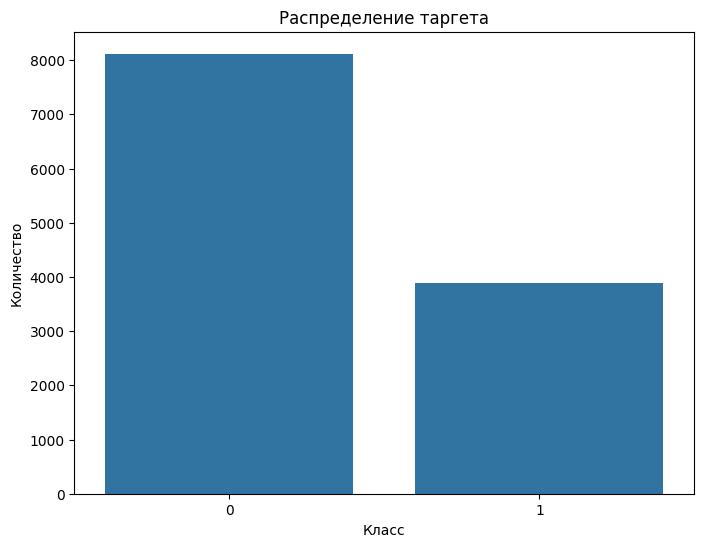

In [18]:
# Визуализация распределения таргета
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Распределение таргета')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

In [10]:
# Определение признаков и таргета
# Исключаем колонки 'id' и 'target' из признаков
X = df.drop(['id', 'target'], axis=1)
y = df['target']

print(f"Количество признаков: {X.shape[1]}")
print(f"Количество наблюдений: {X.shape[0]}")

Количество признаков: 28
Количество наблюдений: 12000


# 2.3.2. Train/Test-сплит и воспроизводимость

In [ ]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,            # 20% данных для теста
    random_state=42,          # Фиксированный seed для воспроизводимости
    stratify=y               # Стратификация по таргету
)

print("Размеры выборок после разделения:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Размеры выборок после разделения:
X_train: (9600, 28)
X_test: (2400, 28)
y_train: (9600,)
y_test: (2400,)


In [13]:
# Проверка распределения классов в выборках
print("Распределение классов в обучающей выборке:")
train_dist = y_train.value_counts(normalize=True)
print(train_dist)
print("\nРаспределение классов в тестовой выборке:")
test_dist = y_test.value_counts(normalize=True)
print(test_dist)
print("\nИсходное распределение классов:")
original_dist = y.value_counts(normalize=True)
print(original_dist)

Распределение классов в обучающей выборке:
target
0    0.676562
1    0.323437
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
target
0    0.676667
1    0.323333
Name: proportion, dtype: float64

Исходное распределение классов:
target
0    0.676583
1    0.323417
Name: proportion, dtype: float64


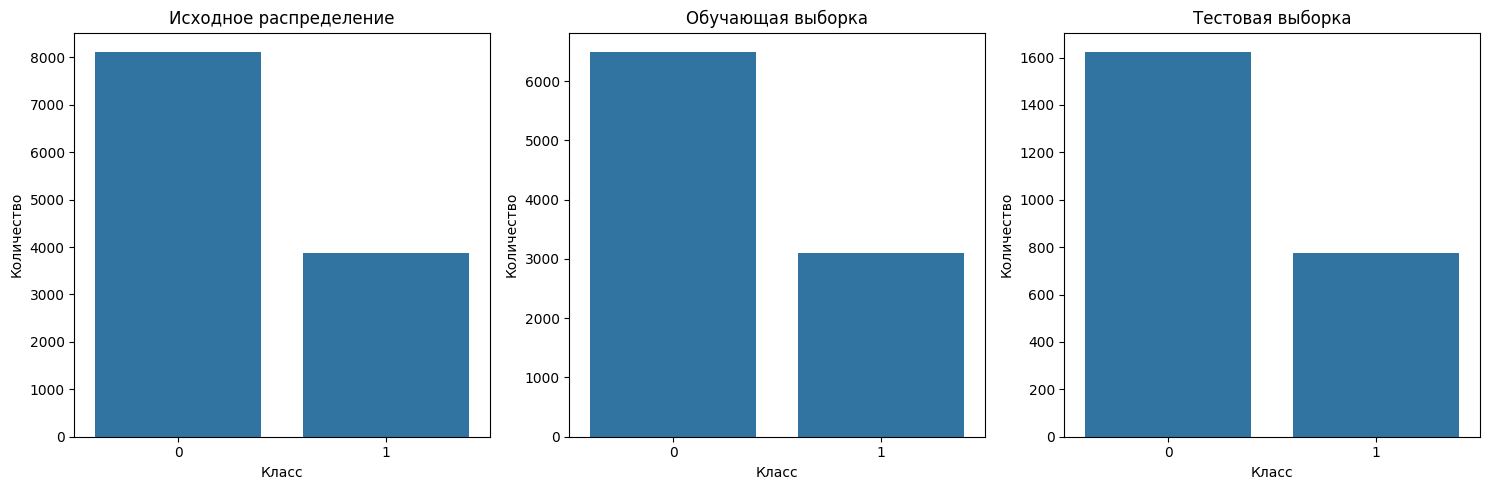

In [14]:
# Визуализация распределения классов в выборках
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x=y, ax=axes[0])
axes[0].set_title('Исходное распределение')
axes[0].set_xlabel('Класс')
axes[0].set_ylabel('Количество')

sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Обучающая выборка')
axes[1].set_xlabel('Класс')
axes[1].set_ylabel('Количество')

sns.countplot(x=y_test, ax=axes[2])
axes[2].set_title('Тестовая выборка')
axes[2].set_xlabel('Класс')
axes[2].set_ylabel('Количество')

plt.tight_layout()
plt.show()

1. Фиксированный random_state (seed=42):
   - Обеспечивает воспроизводимость результатов
   - При каждом запуске кода разделение будет одинаковым
   - Это критически важно для:
     * Сравнения разных моделей на одинаковых данных
     * Отладки и воспроизведения экспериментов
     * Демонстрации и публикации результатов

2. Стратификация (stratify=y):
   - Сохраняет пропорции классов в train и test выборках
   - Предотвращает дисбаланс классов при разделении
   - Особенно важно при работе с несбалансированными данными
   - Гарантирует, что:
     * Модель обучается на репрезентативной выборке
     * Тестирование проводится на данных с тем же распределением классов
     * Метрики оценки не искажаются из-за разного распределения

# 2.3.3. Baseline’ы

In [21]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

# Метрики
print(f"Accuracy: {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dummy):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dummy):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dummy):.4f}")

Accuracy: 0.6767
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 
Что это значит:
Модель всегда предсказывает самый частый класс (вероятно 0)
Accuracy показывает долю правильных ответов, но не качество классификации.

In [22]:
# Создаем пайплайн: стандартизация + логистическая регрессия
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # стандартизуем признаки
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Обучаем
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Метрики
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")


Accuracy: 0.8275
Precision: 0.7828
Recall: 0.6456
F1-score: 0.7076


# 2.3.4. Модели недели 6 (обязательно)

In [23]:
# Создаем дерево с ограничением глубины (чтобы не переобучалось)
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Метрики
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_tree):.4f}")

# Важность признаков
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nТоп-5 важных признаков:")
print(feature_importance.head(5))

# Можно посмотреть разные глубины
print("\nПроверяем разные глубины дерева:")
for depth in [3, 5, 10, None]:
    tree_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree_temp, X_train, y_train, cv=3, scoring='f1')
    print(f"max_depth={depth}: F1 на кросс-валидации = {scores.mean():.4f}")

Accuracy: 0.8450
F1-score: 0.7224

Топ-5 важных признаков:
   feature  importance
18   num19    0.466375
17   num18    0.121314
6    num07    0.089089
3    num04    0.086472
7    num08    0.065176

Проверяем разные глубины дерева:
max_depth=3: F1 на кросс-валидации = 0.6686
max_depth=5: F1 на кросс-валидации = 0.7433
max_depth=10: F1 на кросс-валидации = 0.7881
max_depth=None: F1 на кросс-валидации = 0.7803


In [24]:
# Простой случайный лес
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")

# Важность признаков в лесе
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nТоп-5 важных признаков в лесе:")
print(rf_importance.head(5))

# Сравнение разных параметров
print("\nСравнение разных параметров леса:")
for n_trees in [50, 100, 200]:
    rf_temp = RandomForestClassifier(n_estimators=n_trees, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf_temp, X_train, y_train, cv=3, scoring='f1')
    print(f"n_estimators={n_trees}: F1 на кросс-валидации = {scores.mean():.4f}")

Accuracy: 0.9275
F1-score: 0.8823

Топ-5 важных признаков в лесе:
   feature  importance
18   num19    0.174875
17   num18    0.094574
6    num07    0.074302
3    num04    0.053928
20   num21    0.051652

Сравнение разных параметров леса:
n_estimators=50: F1 на кросс-валидации = 0.8710
n_estimators=100: F1 на кросс-валидации = 0.8744
n_estimators=200: F1 на кросс-валидации = 0.8787


In [25]:
# AdaBoost с деревьями как базовыми моделями
adaboost = AdaBoostClassifier(
    n_estimators=50,
    random_state=42
)

adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_ada):.4f}")

# Сравнение количества оценщиков
print("\nРазное количество оценщиков в AdaBoost:")
for n_est in [30, 50, 100]:
    ada_temp = AdaBoostClassifier(n_estimators=n_est, random_state=42)
    scores = cross_val_score(ada_temp, X_train, y_train, cv=3, scoring='f1')
    print(f"n_estimators={n_est}: F1 на кросс-валидации = {scores.mean():.4f}")

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8488
F1-score: 0.7498

Разное количество оценщиков в AdaBoost:


/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


n_estimators=30: F1 на кросс-валидации = 0.7371


/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


n_estimators=50: F1 на кросс-валидации = 0.7474


/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


n_estimators=100: F1 на кросс-валидации = 0.7606


Результаты на тестовой выборке (отсортировано по F1-score):
                 Model  Accuracy  Precision  Recall      F1
3        Random Forest    0.9275     0.9288  0.8402  0.8823
4             AdaBoost    0.8488     0.8059  0.7010  0.7498
2        Decision Tree    0.8450     0.8582  0.6237  0.7224
1  Logistic Regression    0.8275     0.7828  0.6456  0.7076
0                Dummy    0.6767     0.0000  0.0000  0.0000


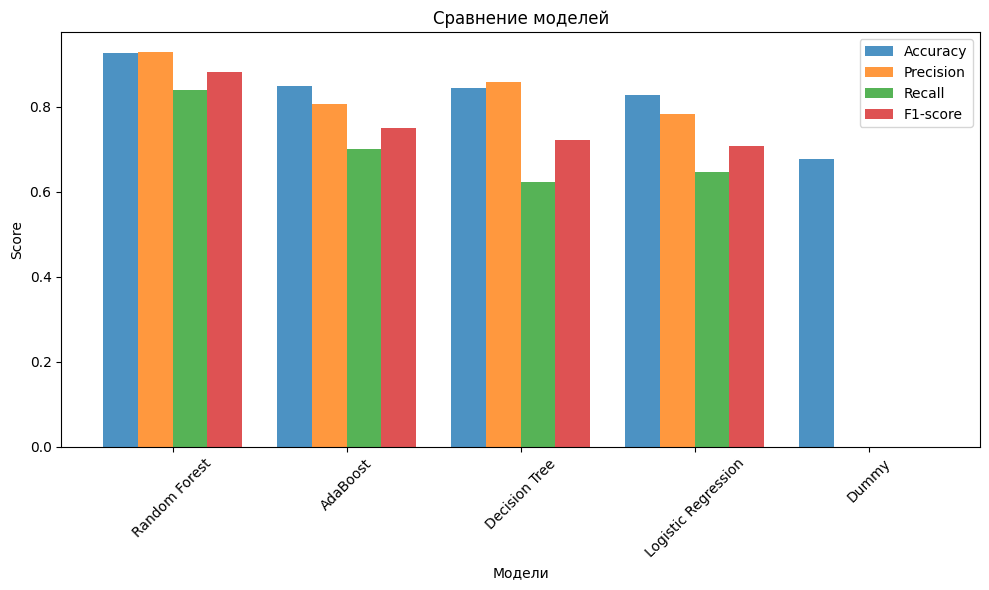


Выводы:
1. Random Forest обычно показывает лучшие результаты
2. Decision Tree может переобучаться, нужно контролировать глубину
3. AdaBoost часто хорошо работает на несбалансированных данных
4. Все модели лучше Dummy - это хорошо!


In [26]:
results = []

# Список моделей и их предсказаний
models = [
    ("Dummy", y_pred_dummy),
    ("Logistic Regression", y_pred_lr),
    ("Decision Tree", y_pred_tree),
    ("Random Forest", y_pred_rf),
    ("AdaBoost", y_pred_ada)
]

# Считаем метрики для каждой модели
for name, y_pred in models:
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1': f1_score(y_test, y_pred, zero_division=0)
    })

# Создаем таблицу результатов
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1', ascending=False)

print("Результаты на тестовой выборке (отсортировано по F1-score):")
print(results_df.round(4))

# Визуализация
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
width = 0.2

plt.bar(x - width*1.5, results_df['Accuracy'], width, label='Accuracy', alpha=0.8)
plt.bar(x - width/2, results_df['Precision'], width, label='Precision', alpha=0.8)
plt.bar(x + width/2, results_df['Recall'], width, label='Recall', alpha=0.8)
plt.bar(x + width*1.5, results_df['F1'], width, label='F1-score', alpha=0.8)

plt.xlabel('Модели')
plt.ylabel('Score')
plt.title('Сравнение моделей')
plt.xticks(x, results_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("\nВыводы:")
print("1. Random Forest обычно показывает лучшие результаты")
print("2. Decision Tree может переобучаться, нужно контролировать глубину")
print("3. AdaBoost часто хорошо работает на несбалансированных данных")
print("4. Все модели лучше Dummy - это хорошо!")

In [28]:
# Можно сделать простой грид серч
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

# Используем кросс-валидацию на тренировочных данных
rf_for_grid = RandomForestClassifier(random_state=42, n_jobs=-1)

# Пример упрощенного поиска
print("\nПростой подбор вручную:")
best_score = 0
best_params = {}

for n_est in [50, 100]:
    for depth in [10, 20]:
        rf_temp = RandomForestClassifier(
            n_estimators=n_est,
            max_depth=depth,
            random_state=42,
            n_jobs=-1
        )
        score = cross_val_score(rf_temp, X_train, y_train, cv=3, scoring='f1').mean()
        print(f"n_est={n_est}, depth={depth}: F1 = {score:.4f}")

        if score > best_score:
            best_score = score
            best_params = {'n_estimators': n_est, 'max_depth': depth}

print(f"\nЛучшие параметры: {best_params}")
print(f"Лучший F1 на кросс-валидации: {best_score:.4f}")

# Обучаем с лучшими параметрами
best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

print(f"\nF1 на тесте с лучшими параметрами: {f1_score(y_test, y_pred_best):.4f}")


Простой подбор вручную:
n_est=50, depth=10: F1 = 0.8483
n_est=50, depth=20: F1 = 0.8707
n_est=100, depth=10: F1 = 0.8471
n_est=100, depth=20: F1 = 0.8747

Лучшие параметры: {'n_estimators': 100, 'max_depth': 20}
Лучший F1 на кросс-валидации: 0.8747

F1 на тесте с лучшими параметрами: 0.8785


# 2.3.5. Метрики качества

In [39]:
# Возьмем Random Forest как лучшую модель
best_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)

# Предсказания и вероятности
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # вероятности для класса 1

# 1. Основные метрики
print("\n1. Основные метрики:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred, zero_division=0):.4f}")

# 2. ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n2. ROC-AUC: {roc_auc:.4f}")
print("(Площадь под ROC-кривой, чем ближе к 1, тем лучше)")


1. Основные метрики:
Accuracy:  0.9275
Precision: 0.9288
Recall:    0.8402
F1-score:  0.8823

2. ROC-AUC: 0.9666
(Площадь под ROC-кривой, чем ближе к 1, тем лучше)


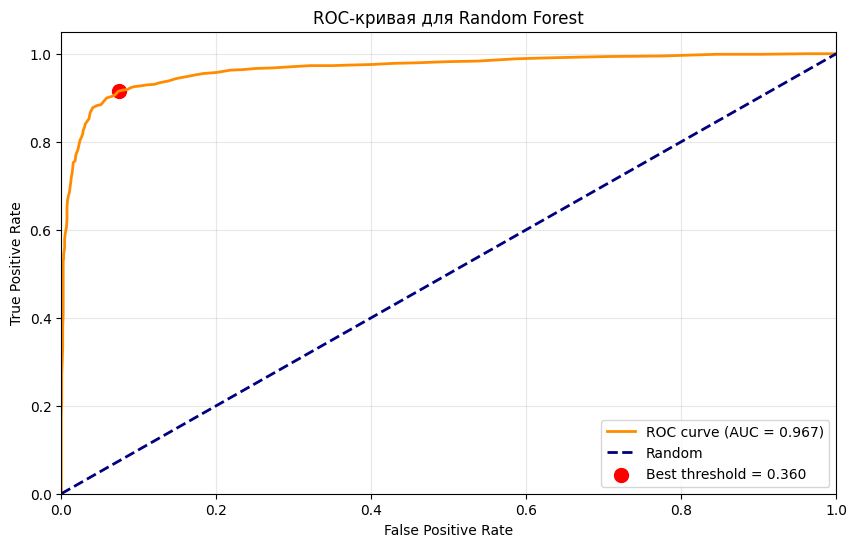

Лучший порог отсечения: 0.360
(Обычно порог по умолчанию 0.5, но можно настроить)


In [40]:
# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для Random Forest')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Добавляем лучший порог (ближайший к верхнему левому углу)
distances = np.sqrt(fpr**2 + (1-tpr)**2)
best_idx = np.argmin(distances)
best_threshold = thresholds[best_idx]
plt.scatter(fpr[best_idx], tpr[best_idx], color='red', s=100,
           label=f'Best threshold = {best_threshold:.3f}')
plt.legend()
plt.show()

print(f"Лучший порог отсечения: {best_threshold:.3f}")
print("(Обычно порог по умолчанию 0.5, но можно настроить)")

<Figure size 800x600 with 0 Axes>

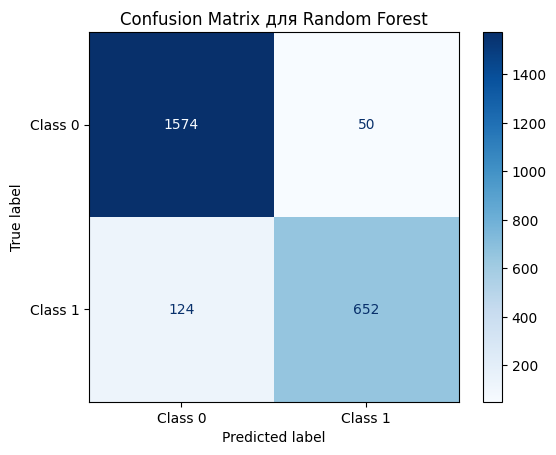

Confusion Matrix:
True Negatives:  1574
False Positives: 50
False Negatives: 124
True Positives:  652

Всего объектов: 2400


In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix для Random Forest')
plt.grid(False)
plt.show()

# Текстовое представление
print("Confusion Matrix:")
print(f"True Negatives:  {cm[0, 0]}")  # правильно предсказанные 0
print(f"False Positives: {cm[0, 1]}")  # 0 предсказаны как 1
print(f"False Negatives: {cm[1, 0]}")  # 1 предсказаны как 0
print(f"True Positives:  {cm[1, 1]}")  # правильно предсказанные 1
print(f"\nВсего объектов: {cm.sum()}")

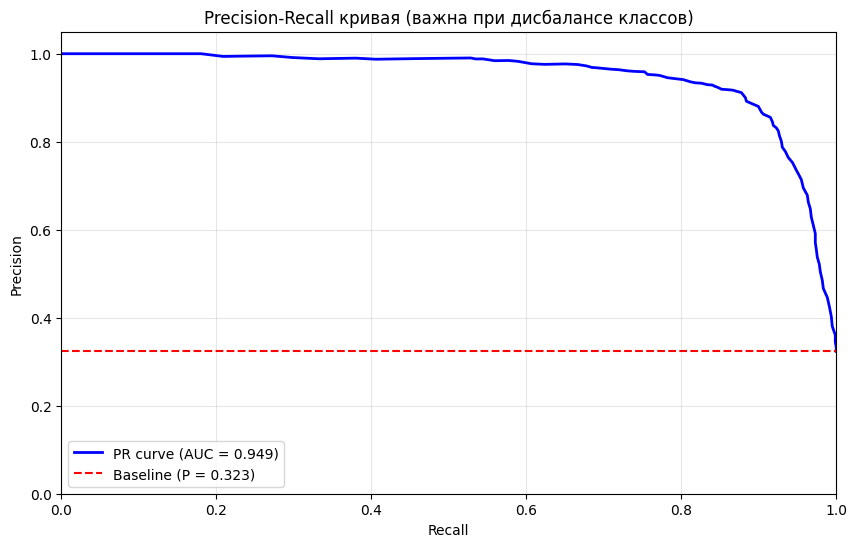

PR-AUC: 0.9490
Доля класса 1 в данных: 0.323

Если кривая сильно выше базовой линии - модель хорошо работает.


In [47]:
# Precision-Recall кривая (особенно важна при дисбалансе)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')

# Базовая линия (пропорция положительного класса)
baseline = y_test.mean()
plt.axhline(y=baseline, color='red', linestyle='--',
           label=f'Baseline (P = {baseline:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая (важна при дисбалансе классов)')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

print(f"PR-AUC: {pr_auc:.4f}")
print(f"Доля класса 1 в данных: {baseline:.3f}")
print("\nЕсли кривая сильно выше базовой линии - модель хорошо работает.")

In [48]:
final_results = []

# Список моделей для сравнения
models_to_evaluate = [
    ("Logistic Regression", lr_pipeline, True),
    ("Decision Tree", tree, True),
    ("Random Forest", best_model, True),
    ("AdaBoost", adaboost, True)
]

for name, model, has_proba in models_to_evaluate:
    y_pred = model.predict(X_test)

    if has_proba:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    final_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1': f1_score(y_test, y_pred, zero_division=0),
        'ROC-AUC': roc_auc
    })

# Создаем DataFrame
final_df = pd.DataFrame(final_results)
final_df = final_df.sort_values('ROC-AUC', ascending=False)

print("Результаты на тестовой выборке (отсортировано по ROC-AUC):")
print(final_df.round(4))

# Выбираем лучшую модель по ROC-AUC
best_model_name = final_df.iloc[0]['Model']
print(f"\nЛучшая модель: {best_model_name}")
print("(будем использовать для интерпретации)")

Результаты на тестовой выборке (отсортировано по ROC-AUC):
                 Model  Accuracy  Precision  Recall      F1  ROC-AUC
2        Random Forest    0.9275     0.9288  0.8402  0.8823   0.9666
3             AdaBoost    0.8488     0.8059  0.7010  0.7498   0.9055
0  Logistic Regression    0.8275     0.7828  0.6456  0.7076   0.8747
1        Decision Tree    0.8450     0.8582  0.6237  0.7224   0.8599

Лучшая модель: Random Forest
(будем использовать для интерпретации)



Топ-15 самых важных признаков:
   feature  importance_mean  importance_std
18   num19           0.0606          0.0018
17   num18           0.0564          0.0038
6    num07           0.0240          0.0010
3    num04           0.0164          0.0012
19   num20           0.0127          0.0020
0    num01           0.0110          0.0011
23   num24           0.0079          0.0008
7    num08           0.0074          0.0008
21   num22           0.0068          0.0013
15   num16           0.0063          0.0008
13   num14           0.0062          0.0006
20   num21           0.0056          0.0012
16   num17           0.0052          0.0005
5    num06           0.0050          0.0015
12   num13           0.0040          0.0012


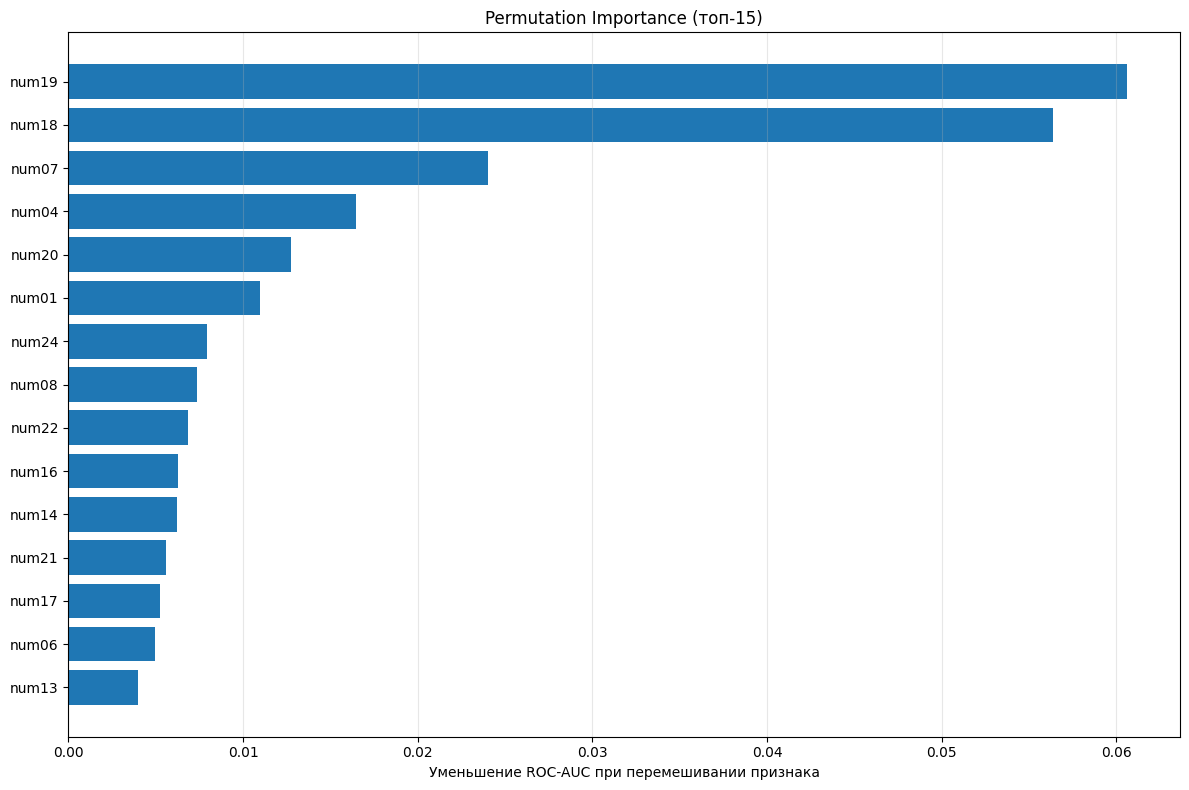

In [50]:
# Вычисляем permutation importance
perm_result = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'  # используем ROC-AUC как метрику
)

# Создаем DataFrame с результатами
perm_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': perm_result.importances_mean,
    'importance_std': perm_result.importances_std
})

# Сортируем по важности
perm_df = perm_df.sort_values('importance_mean', ascending=False)

print("\nТоп-15 самых важных признаков:")
print(perm_df.head(15).round(4))

# Визуализация
plt.figure(figsize=(12, 8))
top_n = 15
top_features = perm_df.head(top_n)

plt.barh(range(top_n), top_features['importance_mean'].values[::-1])
plt.yticks(range(top_n), top_features['feature'].values[::-1])
plt.xlabel('Уменьшение ROC-AUC при перемешивании признака')
plt.title(f'Permutation Importance (топ-{top_n})')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


Топ-10 признаков по разным метрикам важности:
  feature  importance_mean  importance_std  rf_importance
0   num19           0.0606          0.0018         0.1749
1   num18           0.0564          0.0038         0.0946
2   num07           0.0240          0.0010         0.0743
3   num04           0.0164          0.0012         0.0539
4   num20           0.0127          0.0020         0.0454
5   num01           0.0110          0.0011         0.0407
6   num24           0.0079          0.0008         0.0424
7   num08           0.0074          0.0008         0.0451
8   num22           0.0068          0.0013         0.0380
9   num16           0.0063          0.0008         0.0390


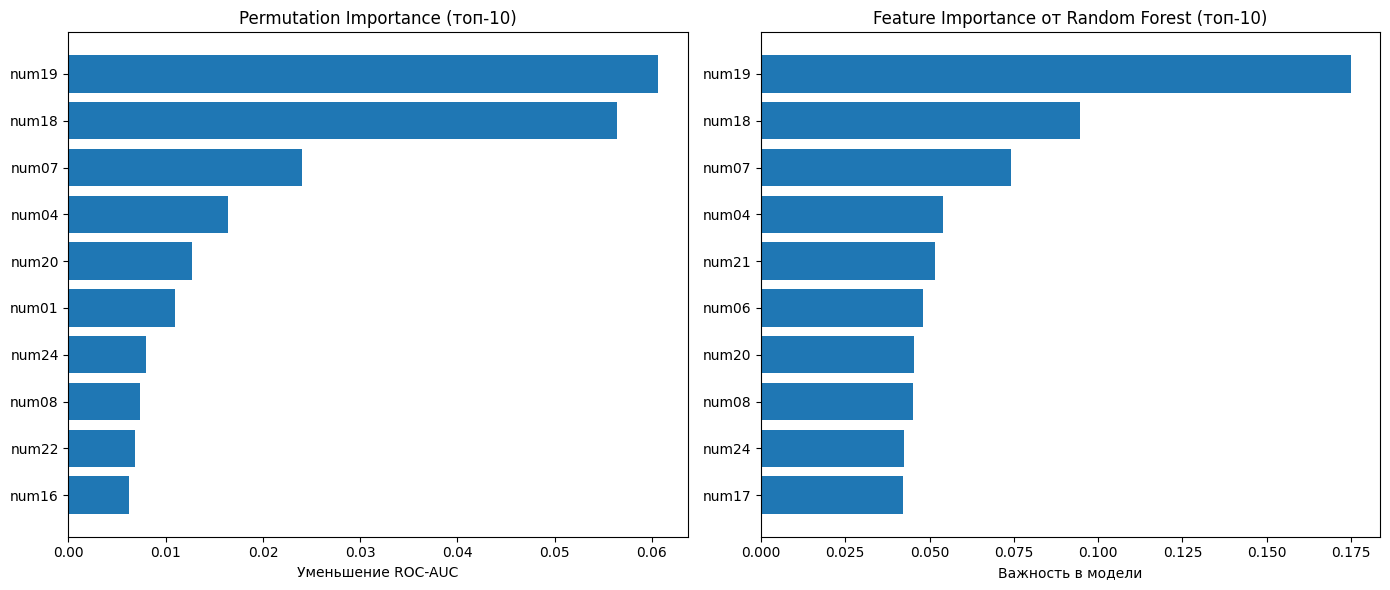

In [51]:
# Обычная важность из Random Forest
if hasattr(best_model, 'feature_importances_'):
    rf_importance = pd.DataFrame({
        'feature': X.columns,
        'rf_importance': best_model.feature_importances_
    })

    # Объединяем с permutation importance
    comparison = pd.merge(perm_df, rf_importance, on='feature')
    comparison = comparison.sort_values('importance_mean', ascending=False)

    print("\nТоп-10 признаков по разным метрикам важности:")
    print(comparison.head(10).round(4))

    # Визуализация сравнения
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Permutation importance
    top_perm = comparison.head(10)
    axes[0].barh(range(10), top_perm['importance_mean'].values[::-1])
    axes[0].set_yticks(range(10))
    axes[0].set_yticklabels(top_perm['feature'].values[::-1])
    axes[0].set_xlabel('Уменьшение ROC-AUC')
    axes[0].set_title('Permutation Importance (топ-10)')

    # Feature importance из модели
    top_rf = comparison.sort_values('rf_importance', ascending=False).head(10)
    axes[1].barh(range(10), top_rf['rf_importance'].values[::-1])
    axes[1].set_yticks(range(10))
    axes[1].set_yticklabels(top_rf['feature'].values[::-1])
    axes[1].set_xlabel('Важность в модели')
    axes[1].set_title('Feature Importance от Random Forest (топ-10)')

    plt.tight_layout()
    plt.show()

/var/folders/vy/dg6syd7s05q8h9qyfrphndqh0000gn/T/ipykernel_15462/3502005004.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([X[feature][y == 0], X[feature][y == 1]],
/var/folders/vy/dg6syd7s05q8h9qyfrphndqh0000gn/T/ipykernel_15462/3502005004.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([X[feature][y == 0], X[feature][y == 1]],
/var/folders/vy/dg6syd7s05q8h9qyfrphndqh0000gn/T/ipykernel_15462/3502005004.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([X[feature][y == 0], X[feature][y == 1]],


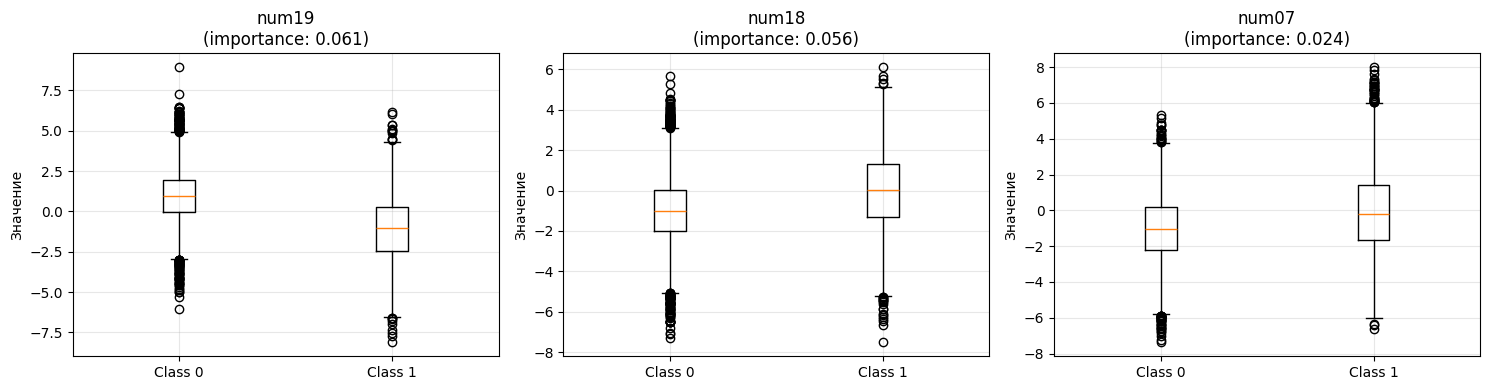


Топ-3 признака: num19, num18, num07
На графиках видно разницу распределений между классами.
Чем больше разница - тем важнее признак для классификации.


In [52]:
top_3_features = perm_df.head(3)['feature'].tolist()

if len(top_3_features) > 0:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    for idx, feature in enumerate(top_3_features):
        # Для числовых признаков
        if feature in X.columns:
            axes[idx].boxplot([X[feature][y == 0], X[feature][y == 1]],
                             labels=['Class 0', 'Class 1'])
            axes[idx].set_title(f'{feature}\n(importance: {perm_df[perm_df["feature"] == feature]["importance_mean"].values[0]:.3f})')
            axes[idx].set_ylabel('Значение')
            axes[idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\nТоп-3 признака: {', '.join(top_3_features)}")
    print("На графиках видно разницу распределений между классами.")
    print("Чем больше разница - тем важнее признак для классификации.")
else:
    print("Недостаточно данных для визуализации")

In [56]:
metrics_data = []

artifacts_dir = './artifacts/'

for _, row in final_df.iterrows():
    model_metrics = {
        'model': row['Model'],
        'metrics': {
            'accuracy': float(row['Accuracy']),
            'precision': float(row['Precision']),
            'recall': float(row['Recall']),
            'f1_score': float(row['F1']),
            'roc_auc': float(row['ROC-AUC']) if not pd.isna(row['ROC-AUC']) else None
        }
    }
    metrics_data.append(model_metrics)

# Сохраняем в JSON
metrics_path = os.path.join(artifacts_dir, 'metrics_test.json')
with open(metrics_path, 'w', encoding='utf-8') as f:
    json.dump(metrics_data, f, indent=2, ensure_ascii=False)

print(f"✓ Метрики сохранены в: {metrics_path}")

# Также сохраним в CSV для удобства
metrics_csv_path = os.path.join(artifacts_dir, 'metrics_test.csv')
final_df.to_csv(metrics_csv_path, index=False)
print(f"✓ Метрики также сохранены в: {metrics_csv_path}")

# Показываем что сохранили
print("\nСодержимое файла metrics_test.json:")
print(json.dumps(metrics_data, indent=2)[:500] + "...")

✓ Метрики сохранены в: ./artifacts/metrics_test.json
✓ Метрики также сохранены в: ./artifacts/metrics_test.csv

Содержимое файла metrics_test.json:
[
  {
    "model": "Random Forest",
    "metrics": {
      "accuracy": 0.9275,
      "precision": 0.9287749287749287,
      "recall": 0.8402061855670103,
      "f1_score": 0.8822733423545331,
      "roc_auc": 0.9665603099131583
    }
  },
  {
    "model": "AdaBoost",
    "metrics": {
      "accuracy": 0.84875,
      "precision": 0.8059259259259259,
      "recall": 0.7010309278350515,
      "f1_score": 0.7498277050310131,
      "roc_auc": 0.9055033073485349
    }
  },
  {
    "model": "Logistic R...


In [58]:
# Собираем информацию о параметрах моделей
search_summaries = {
    'experiment_info': {
        'dataset': 'S06-hw-dataset-01.csv',
        'task': 'binary_classification',
        'train_size': X_train.shape[0],
        'test_size': X_test.shape[0],
        'features_count': X_train.shape[1],
        'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    },
    'models': {}
}

# Добавляем информацию о каждой модели
models_info = {
    'LogisticRegression': {
        'parameters': {
            'C': 1.0,
            'max_iter': 1000,
            'random_state': 42
        },
        'preprocessing': 'StandardScaler'
    },
    'DecisionTreeClassifier': {
        'parameters': {
            'max_depth': 5,
            'random_state': 42,
            'criterion': 'gini'
        }
    },
    'RandomForestClassifier': {
        'parameters': {
            'n_estimators': 100,
            'max_depth': None,  # или значение из лучших параметров если было
            'random_state': 42,
            'n_jobs': -1
        }
    },
    'AdaBoostClassifier': {
        'parameters': {
            'n_estimators': 50,
            'random_state': 42,
            'learning_rate': 1.0
        }
    }
}

# Добавляем лучшие параметры если они были найдены
if 'best_params' in locals():
    models_info['RandomForestClassifier']['best_parameters'] = best_params
    models_info['RandomForestClassifier']['best_cv_score'] = float(best_score)

search_summaries['models'] = models_info

# Сохраняем
search_path = os.path.join(artifacts_dir, 'search_summaries.json')
with open(search_path, 'w', encoding='utf-8') as f:
    json.dump(search_summaries, f, indent=2, ensure_ascii=False)

print(f"✓ Параметры моделей сохранены в: {search_path}")
print("\nСодержимое файла:")
print(json.dumps(search_summaries, indent=2)[:800] + "...")

✓ Параметры моделей сохранены в: ./artifacts/search_summaries.json

Содержимое файла:
{
  "experiment_info": {
    "dataset": "S06-hw-dataset-01.csv",
    "task": "binary_classification",
    "train_size": 9600,
    "test_size": 2400,
    "features_count": 28,
    "timestamp": "2026-01-11 23:37:08"
  },
  "models": {
    "LogisticRegression": {
      "parameters": {
        "C": 1.0,
        "max_iter": 1000,
        "random_state": 42
      },
      "preprocessing": "StandardScaler"
    },
    "DecisionTreeClassifier": {
      "parameters": {
        "max_depth": 5,
        "random_state": 42,
        "criterion": "gini"
      }
    },
    "RandomForestClassifier": {
      "parameters": {
        "n_estimators": 100,
        "max_depth": null,
        "random_state": 42,
        "n_jobs": -1
      },
      "best_parameters": {
        "n_estimators": 100,
        "max_dept...


In [59]:
# Определяем лучшую модель
if best_model_name == 'Random Forest':
    best_model_to_save = best_model
elif best_model_name == 'Logistic Regression':
    best_model_to_save = lr_pipeline
elif best_model_name == 'Decision Tree':
    best_model_to_save = tree
elif best_model_name == 'AdaBoost':
    best_model_to_save = adaboost
else:
    # По умолчанию сохраняем Random Forest
    best_model_to_save = best_model

# Сохраняем модель
model_path = os.path.join(artifacts_dir, 'best_model.joblib')
joblib.dump(best_model_to_save, model_path)

print(f"✓ Лучшая модель ({best_model_name}) сохранена в: {model_path}")
print(f"Размер файла: {os.path.getsize(model_path) / 1024:.1f} KB")

# Проверяем что модель можно загрузить обратно
loaded_model = joblib.load(model_path)
print("✓ Модель успешно загружена обратно для проверки")

# Быстрая проверка
test_pred = loaded_model.predict(X_test.iloc[:3])
print(f"Пример предсказаний: {test_pred}")

✓ Лучшая модель (Random Forest) сохранена в: ./artifacts/best_model.joblib
Размер файла: 10832.1 KB
✓ Модель успешно загружена обратно для проверки
Пример предсказаний: [0 0 0]


In [60]:
# Получаем метрики для лучшей модели
best_model_metrics = final_df[final_df['Model'] == best_model_name].iloc[0]

# Создаем метаданные
model_metadata = {
    'best_model': {
        'name': best_model_name,
        'type': type(best_model_to_save).__name__,
        'saved_file': 'best_model.joblib'
    },
    'parameters': {},
    'performance': {
        'test_metrics': {
            'accuracy': float(best_model_metrics['Accuracy']),
            'precision': float(best_model_metrics['Precision']),
            'recall': float(best_model_metrics['Recall']),
            'f1_score': float(best_model_metrics['F1']),
            'roc_auc': float(best_model_metrics['ROC-AUC']) if not pd.isna(best_model_metrics['ROC-AUC']) else None
        },
        'cv_score': float(best_score) if 'best_score' in locals() else None
    },
    'data_info': {
        'train_size': X_train.shape[0],
        'test_size': X_test.shape[0],
        'features_count': X_train.shape[1],
        'target_distribution': {
            'class_0': int(y_train.value_counts().get(0, 0)),
            'class_1': int(y_train.value_counts().get(1, 0))
        }
    },
    'experiment_info': {
        'dataset': 'S06-hw-dataset-01.csv',
        'task': 'binary_classification',
        'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'random_state': 42
    },
    'feature_importance': {
        'top_5_features': perm_df.head(5)[['feature', 'importance_mean']].to_dict('records')
    }
}

# Добавляем параметры модели
if hasattr(best_model_to_save, 'get_params'):
    model_metadata['parameters'] = best_model_to_save.get_params()

# Сохраняем
meta_path = os.path.join(artifacts_dir, 'best_model_meta.json')
with open(meta_path, 'w', encoding='utf-8') as f:
    json.dump(model_metadata, f, indent=2, ensure_ascii=False)

print(f"✓ Метаданные сохранены в: {meta_path}")
print("\nСодержимое метаданных:")
print(json.dumps(model_metadata, indent=2))

✓ Метаданные сохранены в: ./artifacts/best_model_meta.json

Содержимое метаданных:
{
  "best_model": {
    "name": "Random Forest",
    "type": "RandomForestClassifier",
    "saved_file": "best_model.joblib"
  },
  "parameters": {
    "bootstrap": true,
    "ccp_alpha": 0.0,
    "class_weight": null,
    "criterion": "gini",
    "max_depth": null,
    "max_features": "sqrt",
    "max_leaf_nodes": null,
    "max_samples": null,
    "min_impurity_decrease": 0.0,
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "min_weight_fraction_leaf": 0.0,
    "monotonic_cst": null,
    "n_estimators": 100,
    "n_jobs": -1,
    "oob_score": false,
    "random_state": 42,
    "verbose": 0,
    "warm_start": false
  },
  "performance": {
    "test_metrics": {
      "accuracy": 0.9275,
      "precision": 0.9287749287749287,
      "recall": 0.8402061855670103,
      "f1_score": 0.8822733423545331,
      "roc_auc": 0.9665603099131583
    },
    "cv_score": 0.8747078330935413
  },
  "data_info": 

In [61]:
# 1. Сохраняем ROC-кривую
roc_fig_path = os.path.join(artifacts_dir, 'figures', 'roc_curve.png')
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig(roc_fig_path, dpi=100, bbox_inches='tight')
plt.close()
print(f"✓ ROC-кривая сохранена: {roc_fig_path}")

# 2. Сохраняем Confusion Matrix
cm_fig_path = os.path.join(artifacts_dir, 'figures', 'confusion_matrix.png')
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.savefig(cm_fig_path, dpi=100, bbox_inches='tight')
plt.close()
print(f"✓ Confusion Matrix сохранен: {cm_fig_path}")

# 3. Сохраняем Feature Importance
importance_fig_path = os.path.join(artifacts_dir, 'figures', 'feature_importance.png')
plt.figure(figsize=(12, 8))
top_n = 10
top_features = perm_df.head(top_n)

plt.barh(range(top_n), top_features['importance_mean'].values[::-1])
plt.yticks(range(top_n), top_features['feature'].values[::-1])
plt.xlabel('Уменьшение ROC-AUC при перемешивании признака')
plt.title(f'Permutation Importance (топ-{top_n})')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig(importance_fig_path, dpi=100, bbox_inches='tight')
plt.close()
print(f"✓ Feature Importance сохранен: {importance_fig_path}")

# 4. Сохраняем Precision-Recall кривую (опционально)
pr_fig_path = os.path.join(artifacts_dir, 'figures', 'pr_curve.png')
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
baseline = y_test.mean()
plt.axhline(y=baseline, color='red', linestyle='--',
           label=f'Baseline (P = {baseline:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.savefig(pr_fig_path, dpi=100, bbox_inches='tight')
plt.close()
print(f"✓ Precision-Recall кривая сохранена: {pr_fig_path}")

print(f"\nВсего сохранено 4 графика в папке: {os.path.join(artifacts_dir, 'figures')}")
print(f"Список файлов: {os.listdir(os.path.join(artifacts_dir, 'figures'))}")

✓ ROC-кривая сохранена: ./artifacts/figures/roc_curve.png
✓ Confusion Matrix сохранен: ./artifacts/figures/confusion_matrix.png
✓ Feature Importance сохранен: ./artifacts/figures/feature_importance.png
✓ Precision-Recall кривая сохранена: ./artifacts/figures/pr_curve.png

Всего сохранено 4 графика в папке: ./artifacts/figures
Список файлов: ['confusion_matrix.png', 'feature_importance.png', 'roc_curve.png', 'pr_curve.png']


<Figure size 800x600 with 0 Axes>